# JAR Analysis

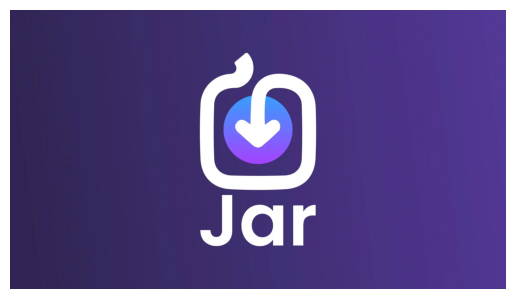

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image (example: "my_image.png")
img = mpimg.imread("JAR.webp")

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


# Importing Of Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Quetion 1: Part 1

# Data Loading 

In [3]:
orders = pd.read_excel("List_of_Orders_1.xlsx")
order_details = pd.read_excel("Order_Details_1.xlsx")

# Viewing the Dataset

In [4]:
display(orders.head())
display(order_details.head())

,Order ID,Order Date,CustomerName,State,City
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad
1,B-25602,2018-04-01,Pearl,Maharashtra,Pune
2,B-25603,2018-04-03,Jahan,Madhya Pradesh,Bhopal
3,B-25604,2018-04-03,Divsha,Rajasthan,Jaipur
4,B-25605,2018-04-05,Kasheen,West Bengal,Kolkata


,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275,-1148,7,Furniture,Bookcases
1,B-25601,66,-12,5,Clothing,Stole
2,B-25601,8,-2,3,Clothing,Hankerchief
3,B-25601,80,-56,4,Electronics,Electronic Games
4,B-25602,168,-111,2,Electronics,Phones


# Merging The Dataset 

In [5]:
DFM=pd.merge(order_details, orders, on='Order ID', how='left')


In [6]:
DFM.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
0,B-25601,1275,-1148,7,Furniture,Bookcases,2018-04-01,Bharat,Gujarat,Ahmedabad
1,B-25601,66,-12,5,Clothing,Stole,2018-04-01,Bharat,Gujarat,Ahmedabad
2,B-25601,8,-2,3,Clothing,Hankerchief,2018-04-01,Bharat,Gujarat,Ahmedabad
3,B-25601,80,-56,4,Electronics,Electronic Games,2018-04-01,Bharat,Gujarat,Ahmedabad
4,B-25602,168,-111,2,Electronics,Phones,2018-04-01,Pearl,Maharashtra,Pune


# Finding out if any duplicates or missing values


In [7]:
print("Shape after merge:", DFM.shape)
print("Missing values:\n", DFM.isnull().sum())

Shape after merge: (1500, 10)
Missing values:
 Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64


In [8]:
DFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      1500 non-null   object        
 1   Amount        1500 non-null   int64         
 2   Profit        1500 non-null   int64         
 3   Quantity      1500 non-null   int64         
 4   Category      1500 non-null   object        
 5   Sub-Category  1500 non-null   object        
 6   Order Date    1500 non-null   datetime64[ns]
 7   CustomerName  1500 non-null   object        
 8   State         1500 non-null   object        
 9   City          1500 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 117.3+ KB


# Caluculation of Key metric

In [9]:
category_summary = (
    DFM.groupby('Category')
    .agg(
        Total_Sales=('Amount', 'sum'),
        Average_Profit_Per_Order=('Profit', 'mean'),
        Total_Profit=('Profit', 'sum')
    )
    .reset_index()
)


In [10]:
print(category_summary)

      Category  Total_Sales  Average_Profit_Per_Order  Total_Profit
0     Clothing       139054                 11.762908         11163
1  Electronics       165267                 34.071429         10494
2    Furniture       127181                  9.456790          2298


# Caluculation Profit Margin 

In [11]:
# Calculate Profit Margin = (Total Profit / Total Sales) * 100
category_summary['Profit_Margin_%'] = (
    category_summary['Total_Profit'] / category_summary['Total_Sales'] * 100
).round(2)

# Sorting by Total Sales

In [12]:
category_summary = category_summary.sort_values(by='Total_Sales', ascending=False)
display(category_summary)

,Category,Total_Sales,Average_Profit_Per_Order,Total_Profit,Profit_Margin_%
1,Electronics,165267,34.071429,10494,6.35
0,Clothing,139054,11.762908,11163,8.03
2,Furniture,127181,9.456790,2298,1.81


###### interpretation

##### 1) Electronics – Strong Sales, Moderate Profitability

a)Highest total sales (₹1.65 lakh) among all categories the most demanded segment.

b)Profit margin of 6.35% indicates moderate profitability  possibly affected by discounts or high procurement costs.

c)Average profit per order (₹34) shows each transaction contributes decently to overall profit.

d)Interpretation: Electronics is a high-revenue but margin-sensitive category strong performer in volume, moderate in efficiency.

e)Strategy: Maintain volume leadership but explore cost optimization and upselling (e.g., accessories, warranties) to enhance margins.

2)Clothing – Best Profitability

a)Profit margin of 8.03%  the highest among all categories.

b)Although total sales (₹1.39 lakh) are slightly below Electronics, the higher margin shows efficient cost management.

c)Average profit per order (₹11.76) is smaller because of lower ticket value per order, but the category is consistently profitable.

Id)nterpretation: Clothing is a high-margin, steady-growth segment  likely supported by frequent repeat purchases and lower logistics costs.

f)Strategy: Increase marketing investment and expand the product range to boost total sales while maintaining margin strength.

️3)Furniture – Underperforming Category

a)Lowest total profit (₹2,298) and lowest margin (1.81%) despite decent total sales (₹1.27 lakh).

b)Average profit per order (₹9.46) is minimal, indicating high costs or deep discounting.

c)Interpretation: Furniture is a low-margin, cost-heavy category  profitability is constrained by shipping, manufacturing, or price competition.

d)Strategy: Reassess pricing strategy, optimize supply chain logistics, and focus on premium or modular furniture items with higher margins.

# Identify performance categories

In [13]:
top_category = category_summary.iloc[0]
bottom_category = category_summary.iloc[-1]

print("Top Performing Category:")
display(top_category)

print("Underperforming Category:")
display(bottom_category)

Top Performing Category:


Category                    Electronics
Total_Sales                      165267
Average_Profit_Per_Order      34.071429
Total_Profit                      10494
Profit_Margin_%                    6.35
Name: 1, dtype: object

Underperforming Category:


Category                    Furniture
Total_Sales                    127181
Average_Profit_Per_Order      9.45679
Total_Profit                     2298
Profit_Margin_%                  1.81
Name: 2, dtype: object

In [14]:
# -----------------------------
print(" Summary Insights:")
print(f"Top-performing category: {top_category['Category']} (Sales ₹{top_category['Total_Sales']:.2f}, Profit Margin {top_category['Profit_Margin_%']}%)")
print(f"Underperforming category: {bottom_category['Category']} (Sales ₹{bottom_category['Total_Sales']:.2f}, Profit Margin {bottom_category['Profit_Margin_%']}%)")

print("\n Possible reasons for performance differences:")
print("- Top category may benefit from higher demand or better pricing strategy.")
print("- Lower-performing category could face high cost, low margin, or poor sales volume.")

 Summary Insights:
Top-performing category: Electronics (Sales ₹165267.00, Profit Margin 6.35%)
Underperforming category: Furniture (Sales ₹127181.00, Profit Margin 1.81%)

 Possible reasons for performance differences:
- Top category may benefit from higher demand or better pricing strategy.
- Lower-performing category could face high cost, low margin, or poor sales volume.


# Data Visualization

### Total sales by catogory

C:\Users\AK\AppData\Local\Temp\ipykernel_24104\476919599.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Total_Sales', data=category_summary, palette='viridis')


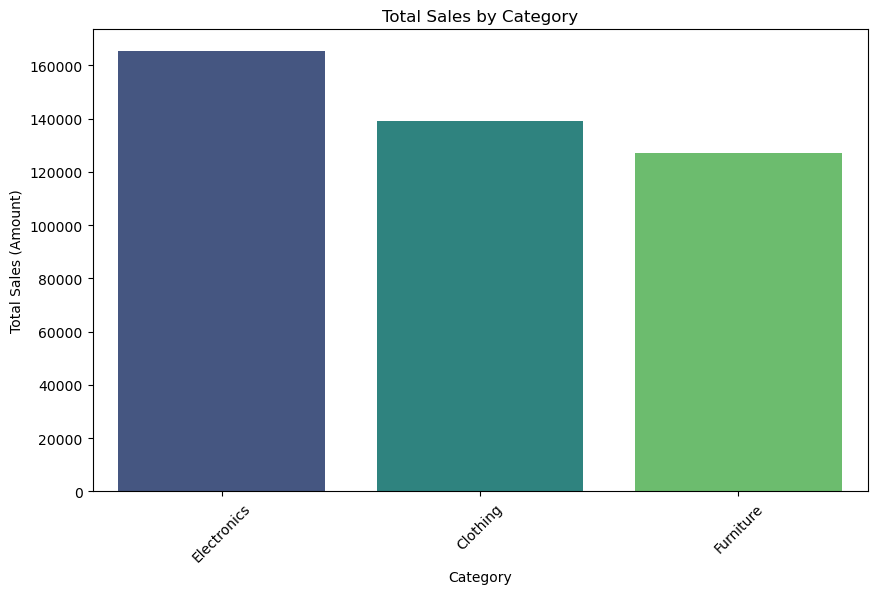

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Total_Sales', data=category_summary, palette='viridis')
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales (Amount)")
plt.xticks(rotation=45)
plt.show()

##### interpretation

##### 1) Electronics –

Electronics generated the highest total sales value (₹1.65 lakh), indicating that it is the most popular and revenue-driving category.

This reflects strong customer demand and possibly higher unit prices per product.

The category contributes the largest share of overall revenue, making it the backbone of the company’s sales performance.

2) Clothing 

Clothing achieved second-highest sales (₹1.39 lakh)  slightly lower than Electronics.

This suggests a steady, reliable sales stream, likely due to frequent purchases and wide customer appeal.

Although not the top revenue generator, Clothing’s sales performance is stable and supports good profit margins.

3) Furniture 

Furniture recorded total sales of ₹1.27 lakh, which is the lowest among the three categories.

Despite moderate sales, its profit contribution is disproportionately low (as seen earlier), hinting that high costs or discounts reduce net gains.

This indicates that while the category sells decently, it does not translate into strong profitability.

### Average Profit per Order

C:\Users\AK\AppData\Local\Temp\ipykernel_24104\733302286.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Average_Profit_Per_Order', data=category_summary, palette='coolwarm')


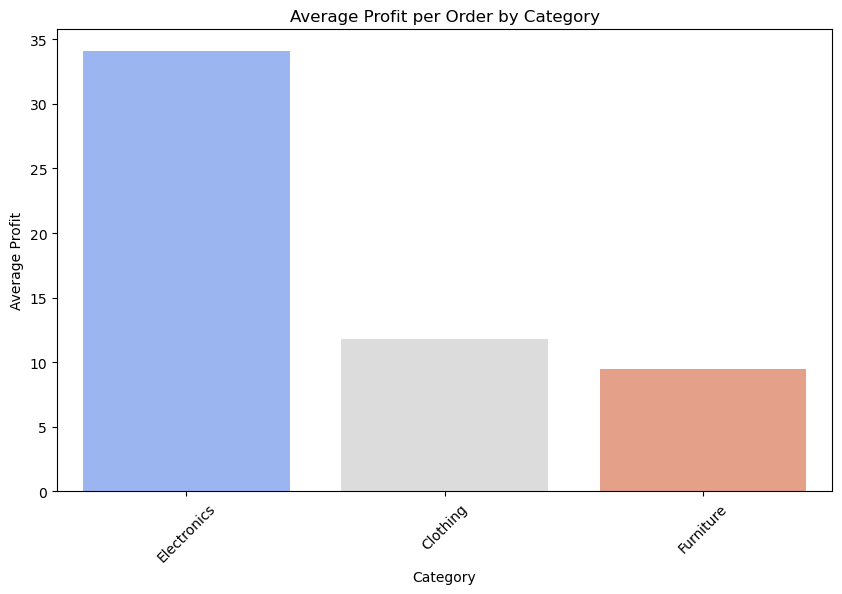

In [16]:

plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Average_Profit_Per_Order', data=category_summary, palette='coolwarm')
plt.title("Average Profit per Order by Category")
plt.xlabel("Category")
plt.ylabel("Average Profit")
plt.xticks(rotation=45)
plt.show()

##### interpretation

##### Electronics

Electronics achieves the highest average profit per order (₹34.07), indicating that each transaction contributes significantly to overall profit.

This suggests that Electronics products have higher price points or better profitability per sale, even though they may involve competitive pricing.

The category efficiently converts each sale into higher profit, making it a strong individual order performer.

Clothing

Clothing records an average profit of ₹11.76 per order, which is much lower than Electronics.

However, because Clothing sales volumes are often high (frequent purchases, repeat customers), this moderate per-order profit can still accumulate into strong total profit.

It indicates lower ticket size but steady turnover, typical in fast-moving consumer goods.

Furniture

Furniture shows the lowest average profit per order (₹9.46), implying that despite higher selling prices, its costs (material, logistics, shipping) eat into margins.

Each sale yields minimal net gain, making it the least efficient category in generating profit per transaction.

### Profit Margin %

C:\Users\AK\AppData\Local\Temp\ipykernel_24104\3536760505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit_Margin_%', data=category_summary, palette='cubehelix')


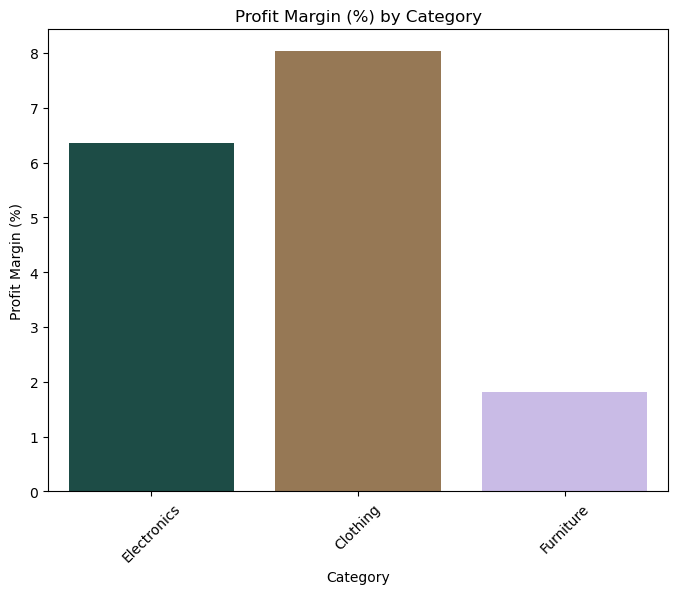

In [17]:

plt.figure(figsize=(8,6))
sns.barplot(x='Category', y='Profit_Margin_%', data=category_summary, palette='cubehelix')
plt.title("Profit Margin (%) by Category")
plt.ylabel("Profit Margin (%)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

##### 1) Clothing – Highest Profit Margin (8.03%)

Clothing has the strongest profitability among all categories.

An 8.03% margin means that for every ₹100 of sales, the company earns ₹8.03 as profit.

This high margin indicates efficient cost control, possibly due to low manufacturing and logistics costs, high markups, or frequent sales of smaller items.

Clothing products are likely fast-moving and less price-sensitive, making this category both stable and profitable.

 Interpretation:
Clothing is the most profitable category, showing strong cost efficiency and high return on sales.

2)Electronics 

Electronics shows a 6.35% margin, which is healthy but slightly below Clothing.

Despite the highest total sales, margins are moderate suggesting tight competition, discounting, or high procurement costs.

Customers in this segment are likely price-sensitive, leading to slimmer per-unit profits.

However, due to the high volume of sales, the category still contributes strongly to overall profits.

 Interpretation:
Electronics is a high-revenue, moderate-margin category  it drives total sales but requires margin protection strategies.

3) Furniture

Furniture records the lowest profitability, with just ₹1.81 profit per ₹100 of sales.

This poor margin is likely caused by high production, storage, and delivery costs, combined with discounts or low turnover rates.

It signals that this category is cost-heavy and operationally inefficient, despite generating decent sales revenue.

 Interpretation:
Furniture is a low-margin, cost-intensive segment that drags overall profitability and needs process improvement or premium repositioning.

### Correlation heatmap 

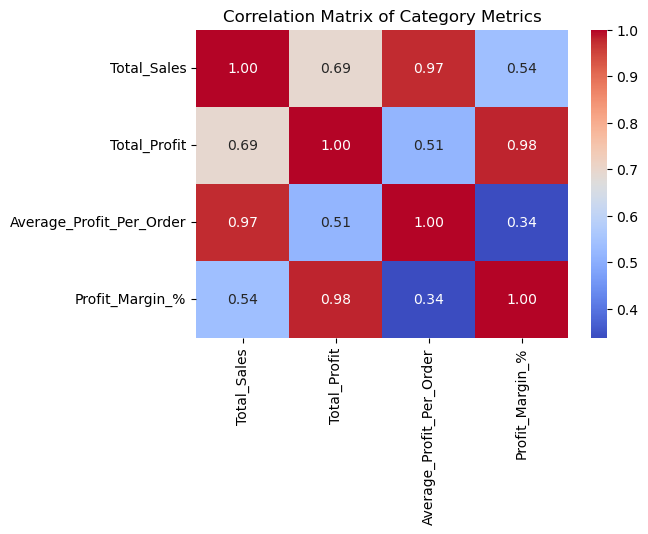

In [18]:

plt.figure(figsize=(6,4))
sns.heatmap(category_summary[['Total_Sales','Total_Profit','Average_Profit_Per_Order','Profit_Margin_%']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Category Metrics")
plt.show()

# Part B

# Loading the Dataset

In [19]:
sales_target = pd.read_excel("Sales_target_1.xlsx")
sales_target.head()

,Month of Order Date,Category,Target
0,2025-04-18,Furniture,10400
1,2025-05-18,Furniture,10500
2,2025-06-18,Furniture,10600
3,2025-07-18,Furniture,10800
4,2025-08-18,Furniture,10900


In [20]:
sales_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Month of Order Date  36 non-null     datetime64[ns]
 1   Category             36 non-null     object        
 2   Target               36 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 996.0+ bytes


# Finding if any duplicate

In [21]:
print("Shape after merge:", sales_target.shape)
print("Missing values:\n", sales_target.isnull().sum())

Shape after merge: (36, 3)
Missing values:
 Month of Order Date    0
Category               0
Target                 0
dtype: int64


# Adjusting the date

In [22]:
sales_target.columns = sales_target.columns.str.strip()  
sales_target['Month of Order Date'] = pd.to_datetime(sales_target['Month of Order Date'], errors='coerce')

In [23]:
sales_target.head()

,Month of Order Date,Category,Target
0,2025-04-18,Furniture,10400
1,2025-05-18,Furniture,10500
2,2025-06-18,Furniture,10600
3,2025-07-18,Furniture,10800
4,2025-08-18,Furniture,10900


# Filtering the furniture

In [24]:
furniture_target = sales_target[sales_target['Category'].str.lower() == 'furniture'].copy()
furniture_target = furniture_target.sort_values('Month of Order Date')

In [25]:
print(furniture_target)

   Month of Order Date   Category  Target
9           2025-01-19  Furniture   11500
10          2025-02-19  Furniture   11600
11          2025-03-19  Furniture   11800
0           2025-04-18  Furniture   10400
1           2025-05-18  Furniture   10500
2           2025-06-18  Furniture   10600
3           2025-07-18  Furniture   10800
4           2025-08-18  Furniture   10900
5           2025-09-18  Furniture   11000
6           2025-10-18  Furniture   11100
7           2025-11-18  Furniture   11300
8           2025-12-18  Furniture   11400


# Calculate Month-over-Month % Change


In [26]:

furniture_target['MoM_%_Change'] = (
    furniture_target['Target'].pct_change() * 100
).round(2)

display(furniture_target)

,Month of Order Date,Category,Target,MoM_%_Change
9,2025-01-19,Furniture,11500,NaN
10,2025-02-19,Furniture,11600,0.87
11,2025-03-19,Furniture,11800,1.72
0,2025-04-18,Furniture,10400,-11.86
1,2025-05-18,Furniture,10500,0.96
2,2025-06-18,Furniture,10600,0.95
3,2025-07-18,Furniture,10800,1.89
4,2025-08-18,Furniture,10900,0.93
5,2025-09-18,Furniture,11000,0.92
6,2025-10-18,Furniture,11100,0.91


# Identify Significant Fluctuations


In [27]:


significant_fluctuations = furniture_target[
    furniture_target['MoM_%_Change'].abs() >1
]
print(" Months with significant fluctuations (>1%):")
display(significant_fluctuations[['Month of Order Date', 'Target', 'MoM_%_Change']])

 Months with significant fluctuations (>1%):


,Month of Order Date,Target,MoM_%_Change
11,2025-03-19,11800,1.72
0,2025-04-18,10400,-11.86
3,2025-07-18,10800,1.89
7,2025-11-18,11300,1.80


# Visualization: Trend & Fluctuations


C:\Users\AK\AppData\Local\Temp\ipykernel_24104\3007857328.py:10: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\AK\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


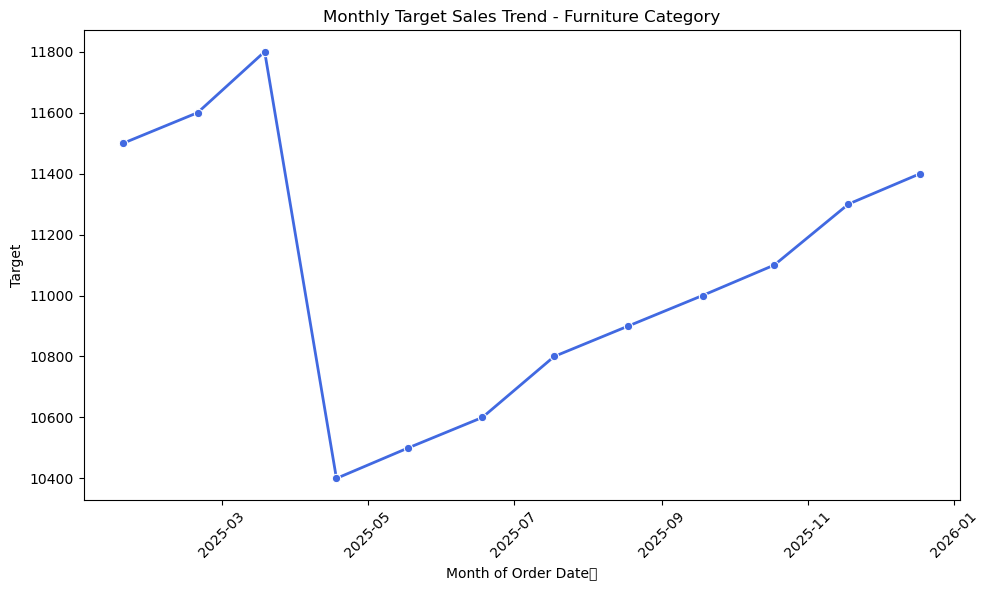

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=furniture_target,
    x='Month of Order Date', y='Target', marker='o', linewidth=2, color='royalblue'
)
plt.title("Monthly Target Sales Trend - Furniture Category")
plt.xlabel("Month of Order Date	")
plt.ylabel("Target")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Percentage Change Plot

C:\Users\AK\AppData\Local\Temp\ipykernel_24104\2045093520.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


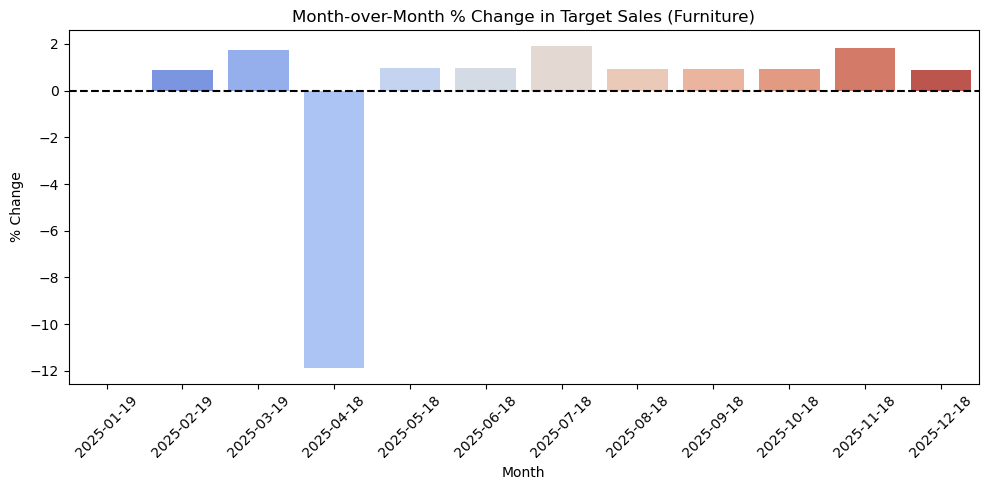

In [29]:

plt.figure(figsize=(10,5))
sns.barplot(
    data=furniture_target,
    x='Month of Order Date', y='MoM_%_Change', palette='coolwarm'
)
plt.axhline(0, color='black', linestyle='--')
plt.title("Month-over-Month % Change in Target Sales (Furniture)")
plt.ylabel("% Change")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### interpretation

##### 1️) Overall Trend

The Furniture sales targets remain stable and gradually increasing through most months of 2025.

Month-over-month (MoM) growth is usually below +2%, showing a consistent but conservative target-setting pattern.

However, April 2025 stands out as a significant anomaly, where the target drops by 11.86% compared to March — the only major negative fluctuation.

2️) Significant Fluctuation: April 2025

April target = ₹10,400, down from ₹11,800 in March.

This sharp decline of nearly 12% could suggest:

A seasonal adjustment — lower sales expected due to off-season demand.

Inventory or supply constraints, leading to conservative targets.

A revised forecasting approach or correction after previous overestimation.

Possibly an internal business decision (budget cuts, shift of focus to other categories).

 3) Gradual Recovery After April

From May onward, the targets rise steadily (~1% per month), showing a controlled recovery trend.

This slow growth indicates that after the April dip, the organization resumed its incremental growth strategy to stabilize performance.

 4)cPerformance Pattern Summary
Phase	Months	Trend	Interpretation
Growth Phase 1	Jan–Mar	+0.8% to +1.7%	Early-year optimism, moderate increase in targets
Correction Phase	Apr	−11.86%	Major adjustment in targets, possible demand drop
Growth Phase 2	May–Dec	+0.9% to +1.9%	Steady month-to-month recovery and stabilization

5) Strategic Interpretation

Stable but cautious planning:

The steady 1% monthly rise shows management’s realistic and consistent approach to setting achievable targets.

April anomaly needs review:

The sharp fall indicates a potential issue — it may reflect either a forecast correction or a business slowdown that warrants further investigation.

Consistent recovery indicates resilience:

After the April dip, the company quickly returned to gradual growth, which demonstrates effective planning adjustments

# Part 3

# Identify Top 5 States by Order Count


In [30]:

top_states = (
    DFM['State']
    .value_counts()
    .head(5)
    .reset_index()
    .rename(columns={'index': 'State', 'State': 'Order_Count'})
)

print(" Top 5 States by Order Count:")
display(top_states)

 Top 5 States by Order Count:


,Order_Count,count
0,Madhya Pradesh,340
1,Maharashtra,290
2,Gujarat,87
3,Rajasthan,74
4,Delhi,74


##### Interpretation

##### 1)️⃣ Madhya Pradesh – Highest Order Volume

Madhya Pradesh leads with 340 orders, making it the largest contributor to total order volume.

This indicates a strong customer base and high market penetration in the region.

The high order count could be due to better product reach, marketing effectiveness, or strong distribution networks.

Interpretation: Madhya Pradesh is the core market driving the majority of sales activity.

️2)  Maharashtra – Strong Secondary Market

With 290 orders, Maharashtra ranks second, only slightly behind Madhya Pradesh.

This shows the state’s significant contribution and potential for scaling.

Being a commercial hub (Mumbai, Pune, Nagpur), it likely benefits from higher purchasing power and accessibility.

Interpretation: Maharashtra is a key growth state and should be prioritized for future promotional campaigns and premium product pushes.

3)  Gujarat – Moderate Activity

87 orders were received from Gujarat, marking a medium performance region.

Though smaller in volume compared to MP and Maharashtra, it shows steady demand that can be expanded through localized marketing.

Interpretation: Gujarat is a developing opportunity market, suitable for regional partnerships and awareness-building efforts.

️4) & 5) Rajasthan and Delhi – Emerging Markets

Both Rajasthan (74 orders) and Delhi (74 orders) have equal order counts, showing relatively low engagement compared to the top two states.

Delhi, being a metropolitan area, has high potential but likely faces strong competition.

Rajasthan’s performance may reflect lower brand penetration or distribution limitations.

Interpretation: These states are underperforming relative to their potential and should be targeted for sales improvement initiatives.

# Calculate Total Sales & Average Profit for Each State


In [31]:

state_summary = (
    DFM.groupby('State')
    .agg(
        Total_Sales=('Amount', 'sum'),
        Average_Profit=('Profit', 'mean'),
        Order_Count=('Order ID', 'count')
    )
    .reset_index()
    .sort_values(by='Order_Count', ascending=False)
)

In [32]:
print(state_summary)


                State  Total_Sales  Average_Profit  Order_Count
10     Madhya Pradesh       105140       16.326471          340
11        Maharashtra        95348       21.296552          290
4             Gujarat        21058        5.344828           87
2               Delhi        22531       40.364865           74
14          Rajasthan        21149       16.986486           74
17      Uttar Pradesh        22359       47.602941           68
18        West Bengal        14086       39.682540           63
1               Bihar        12943       -5.177419           62
13             Punjab        16786      -10.150000           60
8           Karnataka        15058       11.944444           54
7   Jammu and Kashmir        10829        0.163265           49
9              Kerala        13459       41.577778           45
12           Nagaland        11903        3.288889           45
3                 Goa         6705        8.604651           43
0      Andhra Pradesh        13256      

# Data Visualization

# Bar chart: Total Sales by States

C:\Users\AK\AppData\Local\Temp\ipykernel_24104\3311129081.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Total_Sales', data=state_summary, palette='viridis')


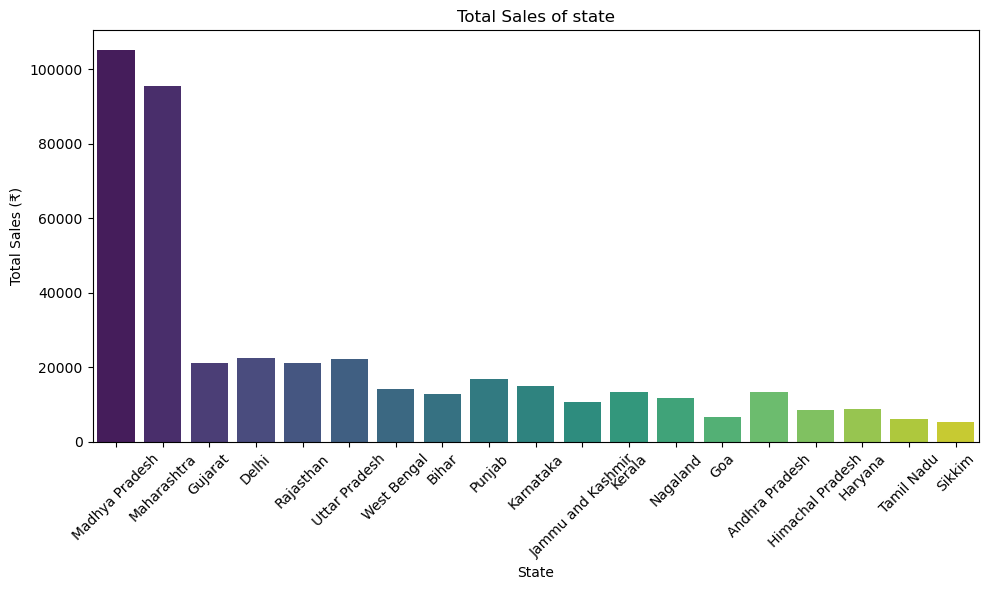

In [33]:

plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Total_Sales', data=state_summary, palette='viridis')
plt.title("Total Sales of state")
plt.xlabel("State")
plt.ylabel("Total Sales (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##### interpretation

##### 1)️⃣ Madhya Pradesh – Highest Order Volume

Madhya Pradesh leads with 340 orders, making it the largest contributor to total order volume.

This indicates a strong customer base and high market penetration in the region.

The high order count could be due to better product reach, marketing effectiveness, or strong distribution networks.

Interpretation: Madhya Pradesh is the core market driving the majority of sales activity.

️2)  Maharashtra – Strong Secondary Market

With 290 orders, Maharashtra ranks second, only slightly behind Madhya Pradesh.

This shows the state’s significant contribution and potential for scaling.

Being a commercial hub (Mumbai, Pune, Nagpur), it likely benefits from higher purchasing power and accessibility.

Interpretation: Maharashtra is a key growth state and should be prioritized for future promotional campaigns and premium product pushes.

3)  Gujarat – Moderate Activity

87 orders were received from Gujarat, marking a medium performance region.

Though smaller in volume compared to MP and Maharashtra, it shows steady demand that can be expanded through localized marketing.

Interpretation: Gujarat is a developing opportunity market, suitable for regional partnerships and awareness-building efforts.

️4) & 5) Rajasthan and Delhi – Emerging Markets

Both Rajasthan (74 orders) and Delhi (74 orders) have equal order counts, showing relatively low engagement compared to the top two states.

Delhi, being a metropolitan area, has high potential but likely faces strong competition.

Rajasthan’s performance may reflect lower brand penetration or distribution limitations.

Interpretation: These states are underperforming relative to their potential and should be targeted for sales improvement initiatives.

# Average profit per order of state

C:\Users\AK\AppData\Local\Temp\ipykernel_24104\612846469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Average_Profit', data=state_summary, palette='coolwarm')


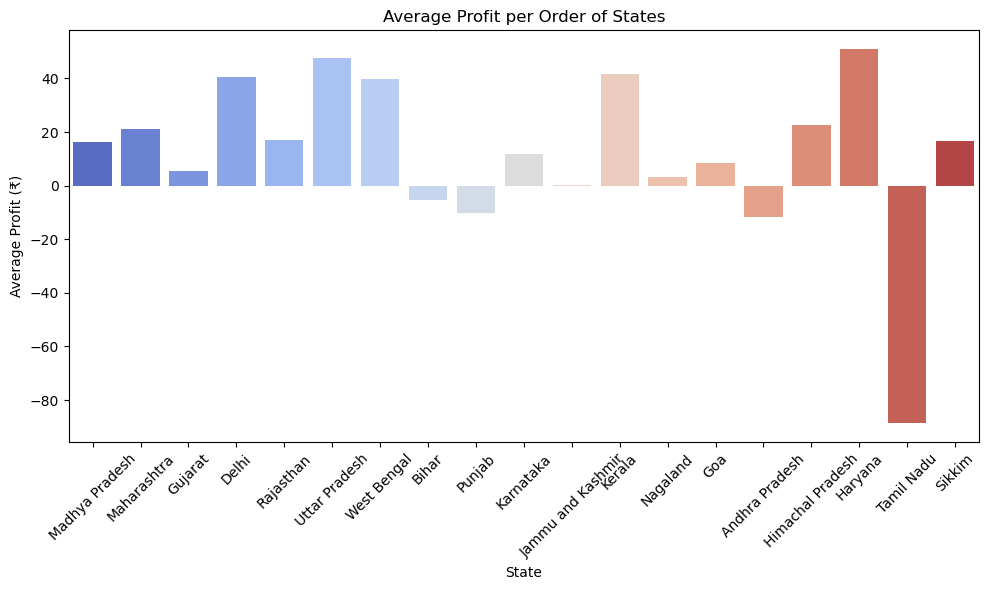

In [34]:

plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Average_Profit', data=state_summary, palette='coolwarm')
plt.title("Average Profit per Order of States")

plt.xlabel("State")
plt.ylabel("Average Profit (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### The bar chart reveals significant regional disparities in profitability across Indian states:

1) High-Performing States (Positive Profit Margins)

Rajasthan, Uttar Pradesh, Gujarat, and Kerala exhibit the highest average profit per order, with Rajasthan leading the chart.

These regions may have:

Lower operational or logistics costs.

Better product-category mix (high-value or low-discount items).

Steady customer demand with balanced pricing strategies.

2) Moderately Performing States

Madhya Pradesh, Maharashtra, Delhi, and Karnataka show moderate profits, suggesting a healthy but competitive market environment.

These states likely benefit from strong urban demand but face tighter margins due to heavy competition and promotional spending.

3) Low or Negative Profit Regions

Tamil Nadu stands out with a substantial negative average profit, indicating losses per order.

Other states like Andhra Pradesh, Bihar, and Haryana show slightly negative or near-zero profits.

Possible causes include:

High logistics or delivery costs.

Excessive discounting or promotional pricing.

Inefficient supply chain operations or returns.

4) Regional Disparity Insight

There is a sharp contrast between northern and southern states:

North & West India (Rajasthan, Gujarat, UP) perform profitably.

South India, particularly Tamil Nadu, underperforms in profitability despite likely strong order volumes.

# Question 2

In [35]:
import pandas as pd

# Create data
data = {
    "Feature": [
        "Spare Change Automation",
        "Digital Gold Investment",
        "Low Entry Barrier (₹10)",
        "Clean, Simple Interface",
        "Quick Liquidity/Withdrawal",
        "note:"
    ],
    "Why It's Great": [
        "Saving is automatic you 'set it and forget it' with UPI round-ups.",
        "Gold is a familiar, trusted asset that lowers the fear of investing.",
        "Highly inclusive; allows users to start saving without major commitment.",
        "Easy to navigate and minimal design prevents confusion for new users.",
        "Knowing you can access your money fast builds confidence and trust.",
        "as a Jar app user i feel the above point are highly user frendly and effective"
    ]
}

# Create DataFrame
features_df = pd.DataFrame(data)

# Display nicely styled table
styled_table = features_df.style.set_properties(
    **{
        'background-color': '#f9f9f9',
        'color': '#333333',
        'border-color': 'black',
        'border-width': '1px',
        'border-style': 'solid',
        'font-size': '14px',
        'text-align': 'left'
    }
).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#2F5597'),
                                 ('color', 'white'),
                                 ('font-size', '15px'),
                                 ('text-align', 'left')]}
])

styled_table


,Feature,Why It's Great
0,Spare Change Automation,Saving is automatic you 'set it and forget it' with UPI round-ups.
1,Digital Gold Investment,"Gold is a familiar, trusted asset that lowers the fear of investing."
2,Low Entry Barrier (₹10),Highly inclusive; allows users to start saving without major commitment.
3,"Clean, Simple Interface",Easy to navigate and minimal design prevents confusion for new users.
4,Quick Liquidity/Withdrawal,Knowing you can access your money fast builds confidence and trust.
5,note:,as a Jar app user i feel the above point are highly user frendly and effective


In [39]:
import pandas as pd

# Data for areas of improvement
improvement_data = {
    "Area for Improvement": [
        "continuous attempts to access UPI",
        "Gold price diffrences",
        "Goal-based Personalization",
        "Fee Transparency",
        "User Education & Guidance",
        "Notification Controls",
        "Customer Support Experience",
        "Note:"
    ],
    "Reason / Suggestion": [
        "if there’s not enough balance in your account for the daily savings cycle the app gives a fail message every few minutes, which can get frustrating.",
        "the price on the dashboard and the prize in the withdrawal page are different.",
        "Allow users to set and track multiple saving goals with custom timelines and risk levels.",
        "Provide a clear fee breakdown and calculator showing how charges impact returns.",
        "Add short explainers, tooltips, and tutorials for first-time investors within the app.",
        "Offer granular notification settings to reduce spam and improve engagement.",
        "Include live chat support, issue tracking, and visible SLAs to build user trust.",
        "Certain things if improved would be great would be great"
    ]
}

# Create DataFrame
improvement_df = pd.DataFrame(improvement_data)

# Styled table (teal theme)
improvement_table = improvement_df.style.set_properties(
    **{
        'background-color': '#f2fbf9',
        'color': '#1a1a1a',
        'border-color': '#009688',
        'border-width': '1px',
        'border-style': 'solid',
        'font-size': '14px',
        'text-align': 'left'
    }
).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#009688'),
                                 ('color', 'white'),
                                 ('font-size', '15px'),
                                 ('text-align', 'left')]}
])

improvement_table


,Area for Improvement,Reason / Suggestion
0,continuous attempts to access UPI,"if there’s not enough balance in your account for the daily savings cycle the app gives a fail message every few minutes, which can get frustrating."
1,Gold price diffrences,the price on the dashboard and the prize in the withdrawal page are different.
2,Goal-based Personalization,Allow users to set and track multiple saving goals with custom timelines and risk levels.
3,Fee Transparency,Provide a clear fee breakdown and calculator showing how charges impact returns.
4,User Education & Guidance,"Add short explainers, tooltips, and tutorials for first-time investors within the app."
5,Notification Controls,Offer granular notification settings to reduce spam and improve engagement.
6,Customer Support Experience,"Include live chat support, issue tracking, and visible SLAs to build user trust."
7,Note:,Certain things if improved would be great would be great


# Question 3

In [41]:
from IPython.display import Markdown

display(Markdown("""
##  The ‘Responsible Credit’ Loop (Gold-Backed Flexi-Credit)

This idea transforms Jar’s savings feature into a **credit safety net**, helping users borrow confidently, with repayments built seamlessly into their existing daily habits.

---

### The Problem
Accessing small, short-term credit is often stressful.  
Users face **high-interest loans**, **predatory lending apps**, or **rigid repayment terms**, especially those new to formal credit systems.

---

### The Jar Experience

**The Credit Invitation (Trust Signal)**  
> “We see your consistent savings discipline. You’ve built ₹10,000 worth of gold in your Jar.  
> As recognition of your good habit, you now have access to *Jar Credit* an instant, pre-approved line of ₹5,000 at a lower interest rate than most lenders.”

**The Auto-Repayment Genius**  
> “No need to worry about EMI dates.  
> Your future round-up savings will automatically contribute toward daily loan repayments.  
> The same effortless system you use to save now helps you repay stress free.”

**The Gold Safety Net**  
> “Your accumulated gold acts as security, keeping your interest rate low and your credit responsible.  
> You stay in control, with instant access to funds when life throws a curveball.”

---

###  The Experience in One Line
The user’s mindset shifts from *“I need a loan”* to *“My savings habit gives me responsible credit access.”*  
It rewards consistency, promotes responsible borrowing, and strengthens trust in Jar as a lifelong financial companion.
---
Note:While the Jar app currently deals only with digital gold, which doesn't require RBI regulation, the company wisely follows RBI-mandated KYC norms, building a base of trust. However, to expand into providing financial services like loans, it will be crucial for Jar to become officially regulated as a Non-Banking Financial Company (NBFC) by the Reserve Bank of India (RBI). Communicating this future regulatory plan will greatly enhance user confidence in the platform's stability and future offerings.
"""))



##  The ‘Responsible Credit’ Loop (Gold-Backed Flexi-Credit)

This idea transforms Jar’s savings feature into a **credit safety net**, helping users borrow confidently, with repayments built seamlessly into their existing daily habits.

---

### The Problem
Accessing small, short-term credit is often stressful.  
Users face **high-interest loans**, **predatory lending apps**, or **rigid repayment terms**, especially those new to formal credit systems.

---

### The Jar Experience

**The Credit Invitation (Trust Signal)**  
> “We see your consistent savings discipline. You’ve built ₹10,000 worth of gold in your Jar.  
> As recognition of your good habit, you now have access to *Jar Credit* an instant, pre-approved line of ₹5,000 at a lower interest rate than most lenders.”

**The Auto-Repayment Genius**  
> “No need to worry about EMI dates.  
> Your future round-up savings will automatically contribute toward daily loan repayments.  
> The same effortless system you use to save now helps you repay stress free.”

**The Gold Safety Net**  
> “Your accumulated gold acts as security, keeping your interest rate low and your credit responsible.  
> You stay in control, with instant access to funds when life throws a curveball.”

---

###  The Experience in One Line
The user’s mindset shifts from *“I need a loan”* to *“My savings habit gives me responsible credit access.”*  
It rewards consistency, promotes responsible borrowing, and strengthens trust in Jar as a lifelong financial companion.
---
Note:While the Jar app currently deals only with digital gold, which doesn't require RBI regulation, the company wisely follows RBI-mandated KYC norms, building a base of trust. However, to expand into providing financial services like loans, it will be crucial for Jar to become officially regulated as a Non-Banking Financial Company (NBFC) by the Reserve Bank of India (RBI). Communicating this future regulatory plan will greatly enhance user confidence in the platform's stability and future offerings.
